In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path = os.getcwd() + '/ex2/ex2data2.txt'

In [3]:
data = pd.read_csv(path, header = None, names=['Test 1', 'Test 2', 'Accepted'])
data.describe()

,Test 1,Test 2,Accepted
count,118.000000,118.000000,118.000000
mean,0.054779,0.183102,0.491525
std,0.496654,0.519743,0.502060
min,-0.830070,-0.769740,0.000000
25%,-0.372120,-0.254385,0.000000
50%,-0.006336,0.213455,0.000000
75%,0.478970,0.646562,1.000000
max,1.070900,1.108900,1.000000


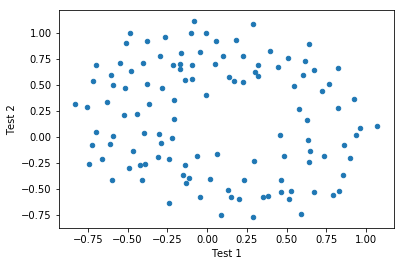

In [4]:
# visualise raw data

data.plot(kind='scatter', x='Test 1', y='Test 2')

Text(0,0.5,'Test 2')

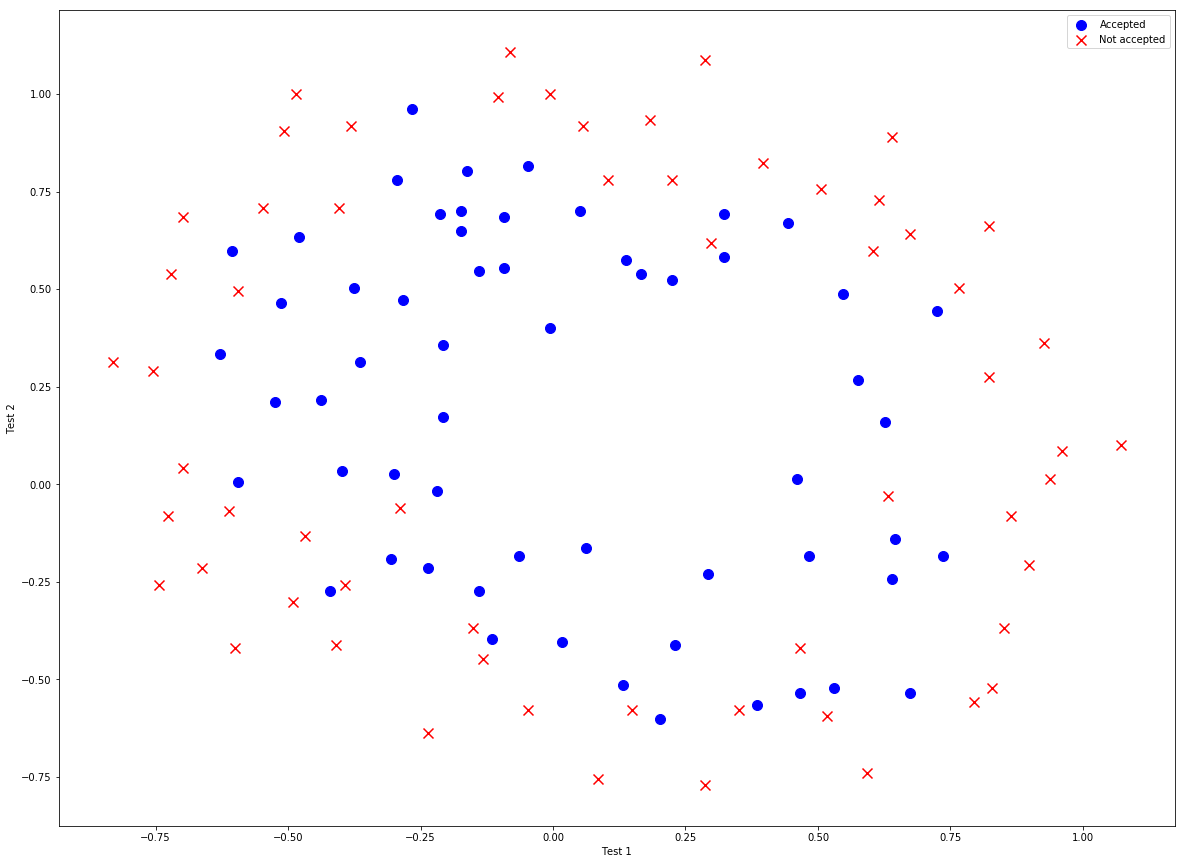

In [5]:
# assign binary class

# dataframe['column name'] to access that column of data
# dataframe['Admitted'].isin([1]) # returns a series True/False if Admitted column in data(data frame) contains 1
# dataframe[] takes in the series of T/F and shows only True entries
class0 = data[data['Accepted'].isin([0])]
class1 = data[data['Accepted'].isin([1])]

# visualise raw data graph

fig, ax = plt.subplots(figsize=(20,15))
ax.scatter(x=class1['Test 1'], y=class1['Test 2'], color='b', marker='o', label='Accepted', s=100)
ax.scatter(x=class0['Test 1'], y=class0['Test 2'], color='r', marker='x', label='Not accepted', s=100)
ax.legend()
ax.set_xlabel('Test 1')
ax.set_ylabel('Test 2')

In [6]:
def map_features(data, degree):
    
    x1 = data.iloc[:,0]
    x2 = data.iloc[:,1]

    for i in range(1, degree+1):
        for j in range(0, i+1):
            name = 'x1^{x} * x2^{y}'.format(x=i-j, y=j)
            data.insert(data.shape[1]-1, name, np.power(x1, i-j) * np.power(x2, j))

    data.drop('x1^1 * x2^0', axis=1, inplace=True)
    data.drop('x1^0 * x2^1', axis=1, inplace=True)
    
    return data

In [7]:
# create design matrix

def create_design_matrix(data):
    data.insert(0, 'x0', 1) # insert feature 0
    X = data.iloc[:,:-1]
    y = data.iloc[:,-1:]
    theta = np.mat(np.zeros((X.shape[1],1)))

    X, y = np.mat(X.values), np.mat(y.values)
    print(X.shape, theta.shape, y.shape)
    
    return data, X, y, theta

In [8]:
# initialise data and matrix

# reset data
data = pd.read_csv(path, header = None, names=['Test 1', 'Test 2', 'Accepted'])
# data.insert(0, 'x0', 1)
# print(data.head())

# map features
degree = 4
data = map_features(data, degree)

# create design matrix and other variales
data, X, y, theta = create_design_matrix(data)
data.head()

(118, 15) (15, 1) (118, 1)


,x0,Test 1,Test 2,x1^2 * x2^0,x1^1 * x2^1,x1^0 * x2^2,x1^3 * x2^0,x1^2 * x2^1,x1^1 * x2^2,x1^0 * x2^3,x1^4 * x2^0,x1^3 * x2^1,x1^2 * x2^2,x1^1 * x2^3,x1^0 * x2^4,Accepted
0,1,0.051267,0.69956,0.002628,0.035864,0.489384,0.000135,0.001839,0.025089,0.342354,0.000007,0.000094,0.001286,0.017551,0.239497,1
1,1,-0.092742,0.68494,0.008601,-0.063523,0.469143,-0.000798,0.005891,-0.043509,0.321335,0.000074,-0.000546,0.004035,-0.029801,0.220095,1
2,1,-0.213710,0.69225,0.045672,-0.147941,0.479210,-0.009761,0.031616,-0.102412,0.331733,0.002086,-0.006757,0.021886,-0.070895,0.229642,1
3,1,-0.375000,0.50219,0.140625,-0.188321,0.252195,-0.052734,0.070620,-0.094573,0.126650,0.019775,-0.026483,0.035465,-0.047494,0.063602,1
4,1,-0.513250,0.46564,0.263426,-0.238990,0.216821,-0.135203,0.122661,-0.111283,0.100960,0.069393,-0.062956,0.057116,-0.051818,0.047011,1


using traditional GDA

In [9]:
# define sigmoid function using lambda function

sigmoid = lambda z: 1 / (1 + np.exp(-z))

In [10]:
# define cost function for logistics regression

def cost_function(theta, X, y):
    predicted_y = sigmoid(X * theta)
    return np.sum(1 / X.shape[0] * (-y.T * np.log(predicted_y) - (1 - y).T * np.log(1 - predicted_y)))

In [11]:
# confirm cost_function works

cost_function(theta, X, y)

0.6931471805599453

In [12]:
# implement normal gradient descent

def gradient_descent(X, y, theta, alpha, iters):
    cost = np.zeros(iters)
    
    for i in range(iters):
        theta = theta - (alpha / X.shape[0] * X.T * (sigmoid(X * theta) - y))
        cost[i] = cost_function(theta, X, y)
    return theta, cost

In [13]:
# plot graph for iters vs cost

def plot_cost(cost, iters):
    fig, ax = plt.subplots(figsize=(20,15))
    ax.plot(np.arange(iters), cost, 'r')
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Cost')
    ax.set_title('Error vs Training Epoch')
    ax.set_xlim(0, iters)
    ax.set_ylim(cost[iters-1], cost[0])
    ax.grid(True)

[[-0.00291457]
 [-0.01714777]
 [ 0.00191666]
 [-0.04840536]
 [-0.01141917]
 [-0.03532748]
 [-0.01723898]
 [-0.0069796 ]
 [-0.00788412]
 [-0.02190786]
 [-0.0381431 ]
 [-0.00216377]
 [-0.01242106]
 [-0.00305858]
 [-0.03764413]]
0.6851749526411698


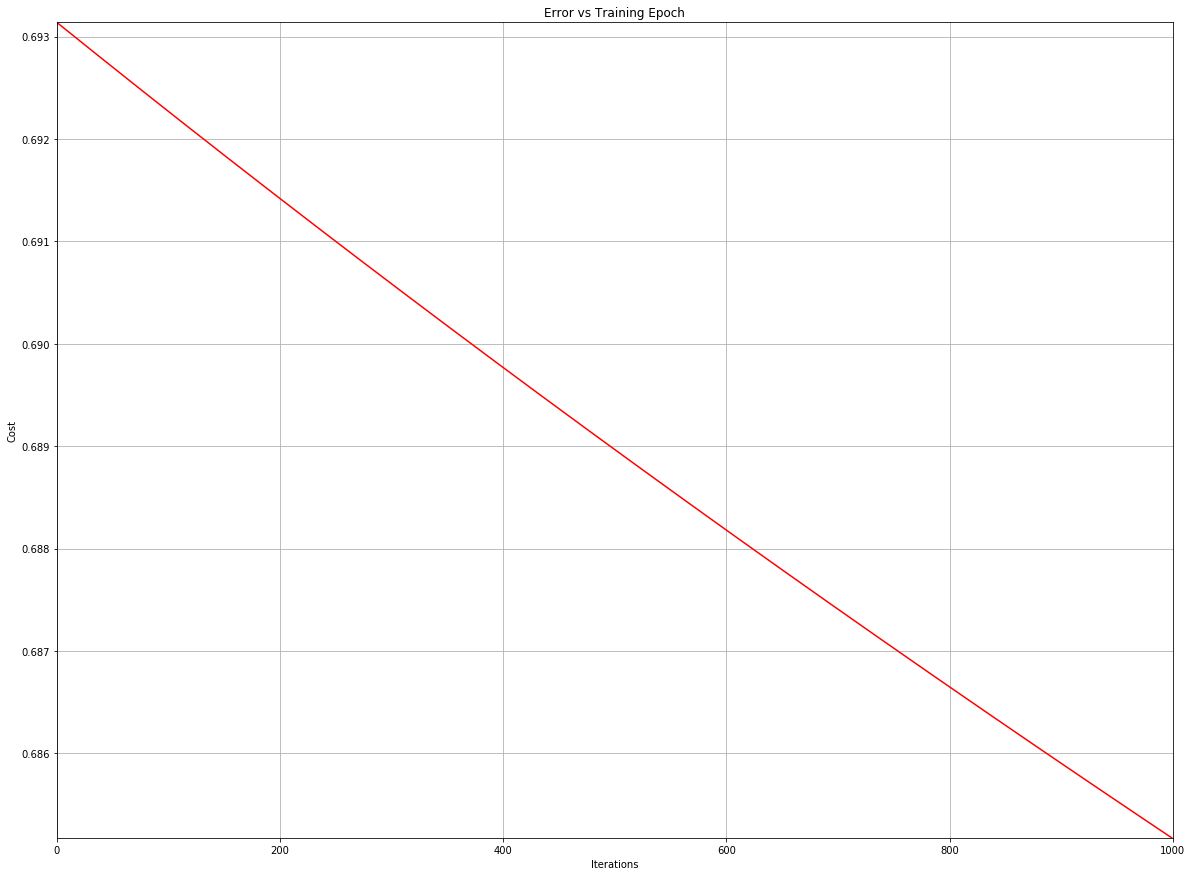

In [14]:
# runs normal GDA and plots graph

alpha = 0.001
iters = 1000
theta = np.mat(np.zeros((X.shape[1],1)))

theta_best, cost = gradient_descent(X, y, theta, alpha, iters)
print(theta_best)
print(np.amin(cost))
plot_cost(cost, iters)

# using opt.fmin_tnc

In [15]:
# define cost function for logistics regression with opt.fmin_tnc

def cost_function(theta, X, y):
    # theta gets auto converted to array:
#     /usr/local/lib/python3.6/site-packages/numpy/matrixlib/defmatrix.py in __mul__(self, other)
#         307         if isinstance(other, (N.ndarray, list, tuple)) :
#         308             # This promotes 1-D vectors to row vectors    
# has to convert theta from n-D array to 1 x n matrix, then transpose to n x 1 matrix
    theta = np.mat(theta).T
    
    predicted_y = sigmoid(X * theta)
    return np.sum(1 / X.shape[0] * (-y.T * np.log(predicted_y) - (1 - y).T * np.log(1 - predicted_y)))

In [16]:
# implement gradient function, partial derivative of cost function
# using lambda function with vector
# has to convert theta from n-D array to 1 x n matrix, then reshape to n x 1 matrix

gradient = lambda theta, X, y: np.array((1 / X.shape[0] * X.T * (sigmoid(X * np.mat(theta).reshape((-1,1))) - y)).T).reshape((X.shape[1]))

In [17]:
# test gradient function is working

gradient(theta, X, y)
theta.shape, X.shape, y.shape

((15, 1), (118, 15), (118, 1))

In [39]:
# uses scipy's truncated newton implementation to find optimal parameters

import scipy.optimize as opt
result = opt.fmin_tnc(func=cost_function, x0=theta, fprime=gradient, args=(X, y))
theta_best = result[0]
print(theta_best)
cost_function(theta_best, X, y)

[  2.98759089  -1.0554282    1.00418585   1.09103426  -5.82250652
  -2.66615149   8.48879655  13.97879906  23.07357585  11.28309668
 -17.95894912  -4.5550748  -36.86592202 -28.93035744 -16.59016479]


0.32190453138669683

In [40]:
def predict(theta, X):
    theta = np.mat(theta).reshape(X.shape[1], 1)
    probability = sigmoid(X * theta)
    return [1 if x >= .5 else 0 for x in probability] # return as array of 0 or 1

In [41]:
predicted = predict(theta_best, X)

In [28]:
# add predicted column into dataframe, catches duplicate error
try:
    data.insert(data.shape[1], 'predicted', predicted)
except ValueError:
    pass
data.head(10)

,x0,Test 1,Test 2,x1^2 * x2^0,x1^1 * x2^1,x1^0 * x2^2,x1^3 * x2^0,x1^2 * x2^1,x1^1 * x2^2,x1^0 * x2^3,x1^4 * x2^0,x1^3 * x2^1,x1^2 * x2^2,x1^1 * x2^3,x1^0 * x2^4,Accepted,predicted
0,1,0.051267,0.699560,0.002628,0.035864,0.489384,0.000135,0.001839,0.025089,0.342354,6.907989e-06,0.000094,0.001286,0.017551,0.239497,1,0
1,1,-0.092742,0.684940,0.008601,-0.063523,0.469143,-0.000798,0.005891,-0.043509,0.321335,7.397855e-05,-0.000546,0.004035,-0.029801,0.220095,1,0
2,1,-0.213710,0.692250,0.045672,-0.147941,0.479210,-0.009761,0.031616,-0.102412,0.331733,2.085928e-03,-0.006757,0.021886,-0.070895,0.229642,1,0
3,1,-0.375000,0.502190,0.140625,-0.188321,0.252195,-0.052734,0.070620,-0.094573,0.126650,1.977539e-02,-0.026483,0.035465,-0.047494,0.063602,1,0
4,1,-0.513250,0.465640,0.263426,-0.238990,0.216821,-0.135203,0.122661,-0.111283,0.100960,6.939303e-02,-0.062956,0.057116,-0.051818,0.047011,1,0
5,1,-0.524770,0.209800,0.275384,-0.110097,0.044016,-0.144513,0.057775,-0.023098,0.009235,7.583610e-02,-0.030319,0.012121,-0.004846,0.001937,1,0
6,1,-0.398040,0.034357,0.158436,-0.013675,0.001180,-0.063064,0.005443,-0.000470,0.000041,2.510192e-02,-0.002167,0.000187,-0.000016,0.000001,1,0
7,1,-0.305880,-0.192250,0.093563,0.058805,0.036960,-0.028619,-0.017987,-0.011305,-0.007106,8.753955e-03,0.005502,0.003458,0.002173,0.001366,1,0
8,1,0.016705,-0.404240,0.000279,-0.006753,0.163410,0.000005,-0.000113,0.002730,-0.066057,7.787282e-08,-0.000002,0.000046,-0.001103,0.026703,1,0
9,1,0.131910,-0.513890,0.017400,-0.067787,0.264083,0.002295,-0.008942,0.034835,-0.135710,3.027686e-04,-0.001180,0.004595,-0.017901,0.069740,1,0


In [29]:
predicted_class0 = data[data['predicted'].isin([0])]
predicted_class1 = data[data['predicted'].isin([1])]

Text(0,0.5,'Test 2')

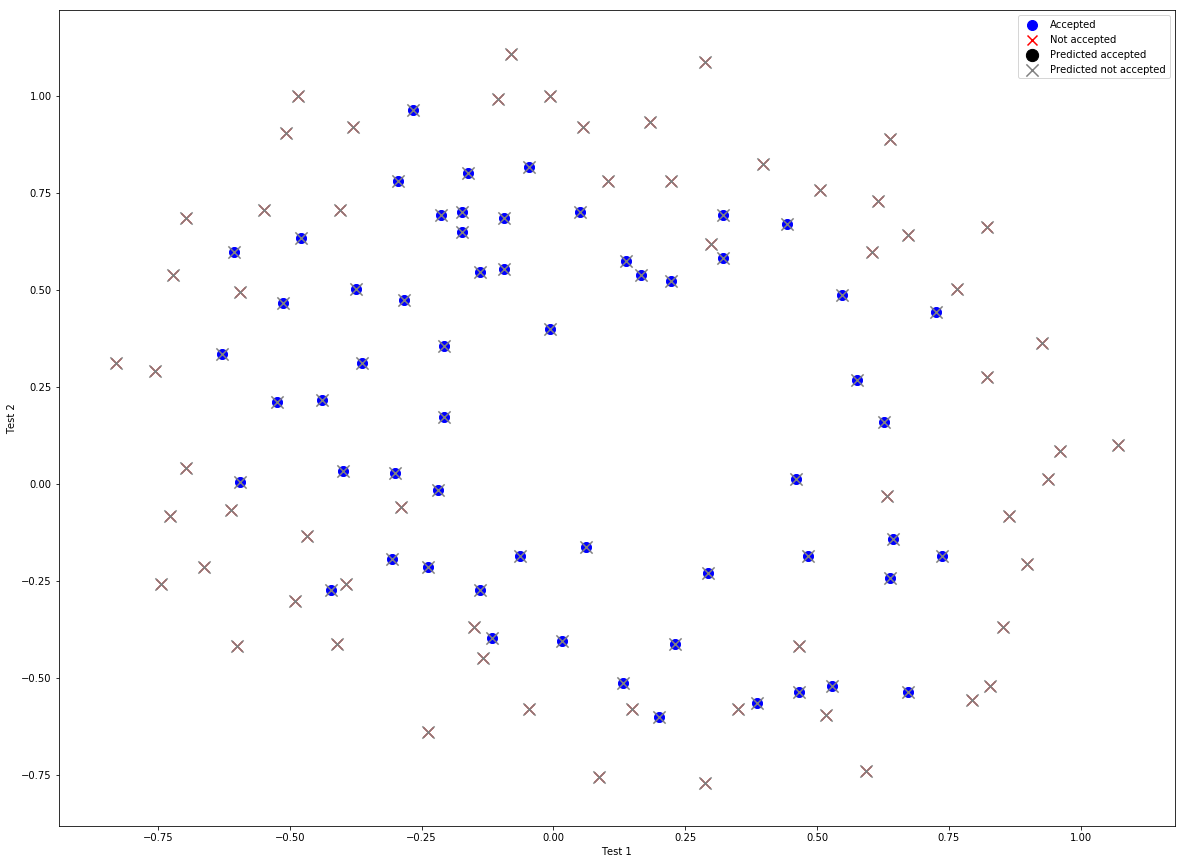

In [30]:
fig, ax = plt.subplots(figsize=(20,15))
ax.scatter(x=class1['Test 1'], y=class1['Test 2'], color='b', marker='o', label='Accepted', s=100)
ax.scatter(x=class0['Test 1'], y=class0['Test 2'], color='r', marker='x', label='Not accepted', s=100)

ax.scatter(x=predicted_class1['Test 1'], y=predicted_class1['Test 2'], color='k', marker='o', label='Predicted accepted', s=150)
ax.scatter(x=predicted_class0['Test 1'], y=predicted_class0['Test 2'], color='grey', marker='x', label='Predicted not accepted', s=150)

ax.legend()
ax.set_xlabel('Test 1')
ax.set_ylabel('Test 2')

In [31]:
# test accuracy of predicted against y

# list comprehension
# need to convert y (matrix) to array, then ravel, then list, as predicted is list
correct = [1 if a == b else 0 for (a, b) in zip(list(np.array(y).ravel()), predicted)]
accurary = np.sum(correct) / len(correct)
print(accurary)

0.5084745762711864


In [32]:
def map_features_grid(data, degree):
    
    x1 = data.iloc[:,0]
    x2 = data.iloc[:,1]

    for i in range(1, degree+1):
        for j in range(0, i+1):
            name = 'x1^{x} * x2^{y}'.format(x=i-j, y=j)
            data.insert(data.shape[1], name, np.power(x1, i-j) * np.power(x2, j))

    data.drop('x1^1 * x2^0', axis=1, inplace=True)
    data.drop('x1^0 * x2^1', axis=1, inplace=True)
    
    return data

[[-0.00291457]
 [-0.01714777]
 [ 0.00191666]
 [-0.04840536]
 [-0.01141917]
 [-0.03532748]
 [-0.01723898]
 [-0.0069796 ]
 [-0.00788412]
 [-0.02190786]
 [-0.0381431 ]
 [-0.00216377]
 [-0.01242106]
 [-0.00305858]
 [-0.03764413]]
[[-0.00291457]
 [-0.01714777]
 [ 0.00191666]
 [-0.04840536]
 [-0.01141917]
 [-0.03532748]
 [-0.01723898]
 [-0.0069796 ]
 [-0.00788412]
 [-0.02190786]
 [-0.0381431 ]
 [-0.00216377]
 [-0.01242106]
 [-0.00305858]
 [-0.03764413]]


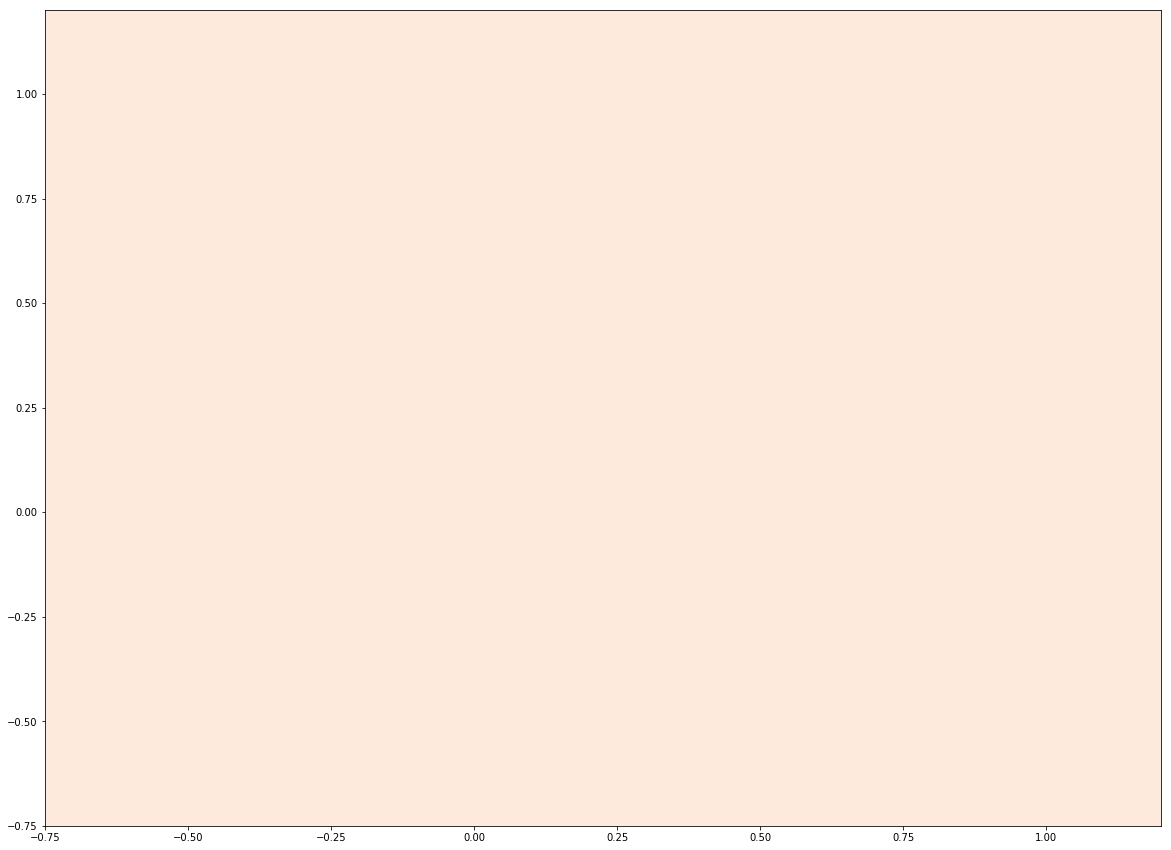

In [33]:
# plot decision boundary using mesh

x_min, x_max = -0.75, 1.2
y_min, y_max = -0.75, 1.2
step = 1000

# create a grid mesh
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, step),
    np.linspace(y_min, y_max, step)
)

# ravel the grid to a list, then stack together
test_grid = np.hstack((xx.ravel().reshape(-1,1), yy.ravel().reshape(-1,1)))

# map features, create design matrix
test_grid = map_features_grid(pd.DataFrame(test_grid), degree)
test_grid.insert(0, 'x0', 1) # insert feature 0
test_grid = np.array(test_grid)

predicted_grid = predict(theta_best, test_grid) # get a list of 0 and 1
predicted_grid = np.array(predicted_grid).reshape(xx.shape) # convert to np array, then reshape to x by x grid, for contour plot later
# print(predicted_grid)

plt.figure(figsize=((20,15)))
plt.contourf(xx, yy, predicted_grid, cmap = 'RdGy')